# Исследование продаж компьютерных игр

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Откроем файл с данными и изучим основную информацию.

Импортируем необходимые библиотеки для проведения исследования.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

# настроим отображение датафрейма
# поставим вывод всех столбцов
pd.set_option('display.max_columns', None)
# поставим вывод всех строк
pd.set_option('display.max_rows', None)

import sys
# для вывода всех значений в массиве
np.set_printoptions(threshold=sys.maxsize)

Прочитаем файл с данными и создадим датафрейм.

In [2]:
# прочитаем данные
data = pd.read_csv('C:/Users/Sam/DA/Projects_YandexPracticum/Project5_games/games.csv')

Просмотрим первые 20 строк датафрейма.

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Просмотрим последние 20 строк датафрейма.

In [4]:
data.tail(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.00,0.0,67.0,tbd,E
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.0,61.0,5.8,T
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.00,0.0,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.00,0.0,48.0,tbd,E
16699,The Longest 5 Minutes,PSV,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.0,NaN,tbd,E


Ознакомимся с информацией о датафрейме.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Построим общую гистограмму для датафрейма для более детального ознакомления с данными.

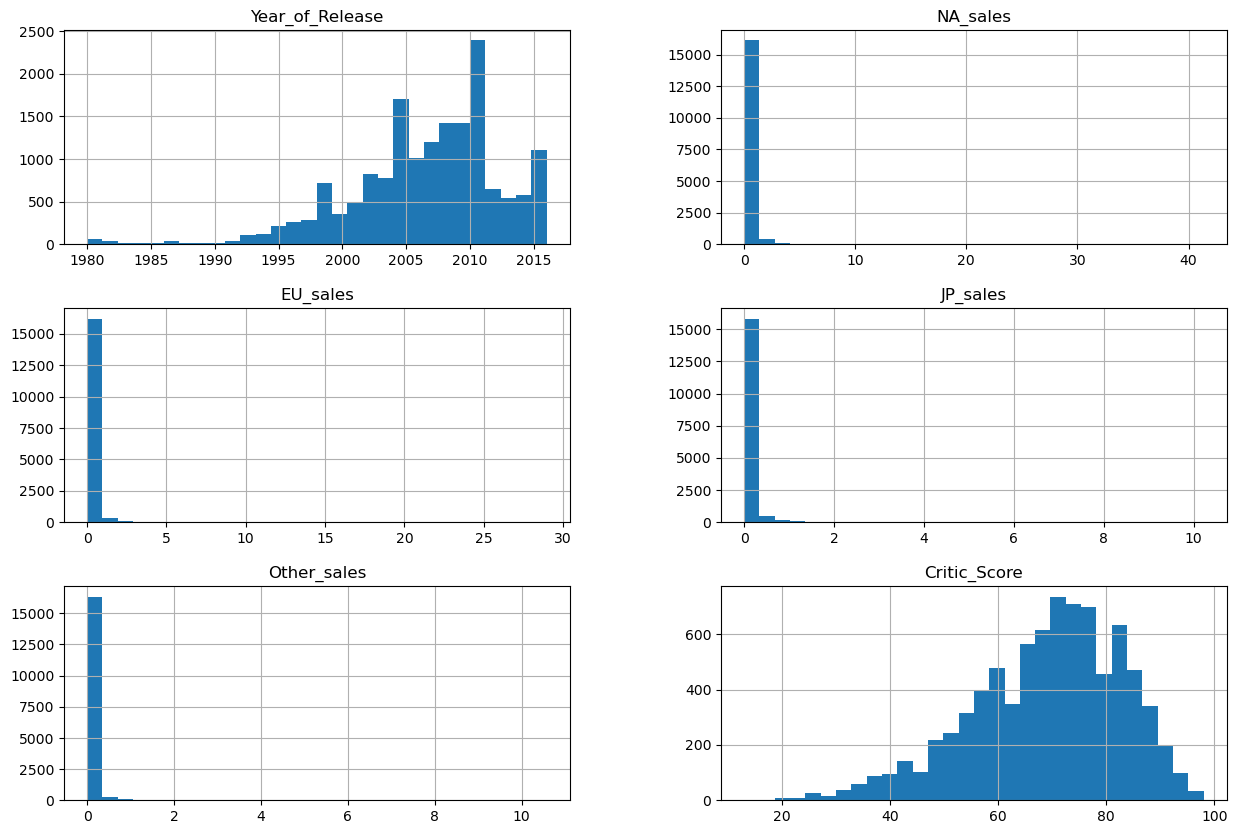

In [6]:
data.hist(bins=30, figsize=(15, 10))
plt.show()

**Вывод:**

1. В данных замечены пропуски в столбцах `Critic_Score`, `User_Score`, `Rating`. Предварительно считаем, что эти пропуски связаны либо с тем что игра выходила давно, либо не была оценена.

2. Названия столбцов не соответствуют 'змеиному регистру'. Столбцы будем приводить к правильному виду.

3. В столбце `User_Score` встречается значение `tbd`. Необходимо выяснить что это.

4. Просмотрев гистограмы, можно сделать предварительный вывод. Столбцы `NA_sales`, `EU_sales`, `JP_sales`, `Other_sales` имеют смещенное вправо распределение. А столбцы `Year_of_Release` и `Critic_Score` имеют смещенное влево распределение. Также в `Year_of_Release` видны выбросы. Надо подробнее иследовать эти столбцы и обработать выбросы.

## Подготовим данные к анализу.

### Приведение столбцов к единому стилю.

Приведем столбцы к 'змеиному регистру'.

In [7]:
# просмотрим названия столбцов
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [8]:
# приведем столбцы к нижнему регистру
data.columns = data.columns.str.lower()

In [9]:
# проверим
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

Обработаем пропуски.
Объясним почему их надо заполнить определённым образом или почему не надо это делать.

Опишите причины, которые могли привести к пропускам.
Рассмотрим аббревиатуру 'tbd' в столбце с оценкой пользователей.

Посчитаем пропуски в датафрейме.

In [10]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Узнаем длину датафрейма до обработки.

In [11]:
len(data)

16715

Посмотрим пропуски в `name`.

In [12]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видно, что в этих строках 2 пропуска и по столбцу `genre`. Видны пропуски и по рейтингам.

Пропуска всего 2. Данные по названию и жанру игры мы узнать не можем. Эти данные за старые года, на исследование сильно не влияют. Заполним их значением 'unknown'.

Возможные причины пропусков в столбцах `name` и `genre`: ошибка сохранения или выгрузки данных. Данные могли быть утеряны по этим играм 1993 годов.

In [13]:
# заполним пропуски в столбцах
data['name'] = data['name'].fillna('unknown')
data['genre'] = data['genre'].fillna('unknown')

Посмотрим пропуски в `year_of_release`.

In [14]:
data[data['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Мы не можем быстро и качественно заполнить пропуски по году релиза игр , так как по большинству игр надо вручную находить год издания. Что долго. Медианное и среднее значение здесь не подходит, точный год релиза важен.

Пропусков всего 269. Пропуски заполнять не будем.

Возможные причины пропусков в столбце `year_of_release`: ошибка выгрузки данных или данные не были введены по этим играм.

Посмотрим пропуски в `critic_score`, `user_score`, `rating`.

In [15]:
data[data['critic_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [16]:
data[data['critic_score'].isna()].tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.0,NaN,tbd,E
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Видно, что часто пропуски появляются сразу в 3 столбцах со значением рейтинга:  `critic_score`, `user_score`, `rating`.

Пропуски в столбцах со значением рейтинга мы не можем качественно заполнить. Точный рейтинг нам важен для исследования. 
Оставим пропуски в столбцах `critic_score`, `user_score`, `rating`.

Возможные причины пропусков в столбце столбцах `critic_score`, `user_score`, `rating`: эти игры не оценивались, поэтому данные отсутствуют по этим играм, либо это ошибка выгрузки данных, т.к. пропуски встречаются во многих строках.

Проверим изменения в пропусках.

In [17]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

### Обработка дубликатов.

Просмотрим уникальные значения `name`. Приведем значения к нижнему регистру.

In [18]:
# переводим в нижний регистр
data['name'] = data['name'].str.lower()

# смотрим уникальные значения
display(data['name'].sort_values().unique())

array([' beyblade burst', ' fire emblem fates', " frozen: olaf's quest",
       ' haikyu!! cross team match!', ' tales of xillia 2', "'98 koshien",
       '.hack//g.u. vol.1//rebirth', '.hack//g.u. vol.2//reminisce',
       '.hack//g.u. vol.2//reminisce (jp sales)',
       '.hack//g.u. vol.3//redemption', '.hack//infection part 1',
       '.hack//link', '.hack//mutation part 2', '.hack//outbreak part 3',
       '.hack//quarantine part 4: the final chapter',
       '.hack: sekai no mukou ni + versus', '007 racing',
       '007: quantum of solace', '007: the world is not enough',
       '007: tomorrow never dies', '1 vs. 100', '1/2 summer +',
       '10 minute solution', '100 all-time favorites',
       '100 classic books', '100 classic games',
       '1000 cooking recipes from elle à table', '1001 touch games',
       '101-in-1 explosive megamix', '101-in-1 party megamix wii',
       '101-in-1 sports megamix', '101-in-1 sports party megamix',
       '1080°: teneighty snowboarding', '11e

In [19]:
# узнаем количество уникальных значений
len(data['name'].sort_values().unique())

11560

Количество игр огромное: 11560. Беглый просмотр названий не выявил проблем в названиях. Возможные дубликаты из-за разного регистра были обработаны переводом в нижний регистр всех значений.

Просмотрим уникальные значения `platform`.

In [20]:
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Дубликатов нет.

Просмотрим уникальные значения `year_of_release`.

In [21]:
data['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

Дубликатов нет.

Просмотрим уникальные значения `genre`.

In [22]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', 'unknown'], dtype=object)

Дубликатов нет.

Просмотрим уникальные значения `na_sales`.

In [23]:
data['na_sales'].sort_values().unique()

array([0.000e+00, 1.000e-02, 2.000e-02, 3.000e-02, 4.000e-02, 5.000e-02,
       6.000e-02, 7.000e-02, 8.000e-02, 9.000e-02, 1.000e-01, 1.100e-01,
       1.200e-01, 1.300e-01, 1.400e-01, 1.500e-01, 1.600e-01, 1.700e-01,
       1.800e-01, 1.900e-01, 2.000e-01, 2.100e-01, 2.200e-01, 2.300e-01,
       2.400e-01, 2.500e-01, 2.600e-01, 2.700e-01, 2.800e-01, 2.900e-01,
       3.000e-01, 3.100e-01, 3.200e-01, 3.300e-01, 3.400e-01, 3.500e-01,
       3.600e-01, 3.700e-01, 3.800e-01, 3.900e-01, 4.000e-01, 4.100e-01,
       4.200e-01, 4.300e-01, 4.400e-01, 4.500e-01, 4.600e-01, 4.700e-01,
       4.800e-01, 4.900e-01, 5.000e-01, 5.100e-01, 5.200e-01, 5.300e-01,
       5.400e-01, 5.500e-01, 5.600e-01, 5.700e-01, 5.800e-01, 5.900e-01,
       6.000e-01, 6.100e-01, 6.200e-01, 6.300e-01, 6.400e-01, 6.500e-01,
       6.600e-01, 6.700e-01, 6.800e-01, 6.900e-01, 7.000e-01, 7.100e-01,
       7.200e-01, 7.300e-01, 7.400e-01, 7.500e-01, 7.600e-01, 7.700e-01,
       7.800e-01, 7.900e-01, 8.000e-01, 8.100e-01, 

Проблемы в данных не видны.

Просмотрим уникальные значения `eu_sales`.

In [24]:
data['eu_sales'].sort_values().unique()

array([0.000e+00, 1.000e-02, 2.000e-02, 3.000e-02, 4.000e-02, 5.000e-02,
       6.000e-02, 7.000e-02, 8.000e-02, 9.000e-02, 1.000e-01, 1.100e-01,
       1.200e-01, 1.300e-01, 1.400e-01, 1.500e-01, 1.600e-01, 1.700e-01,
       1.800e-01, 1.900e-01, 2.000e-01, 2.100e-01, 2.200e-01, 2.300e-01,
       2.400e-01, 2.500e-01, 2.600e-01, 2.700e-01, 2.800e-01, 2.900e-01,
       3.000e-01, 3.100e-01, 3.200e-01, 3.300e-01, 3.400e-01, 3.500e-01,
       3.600e-01, 3.700e-01, 3.800e-01, 3.900e-01, 4.000e-01, 4.100e-01,
       4.200e-01, 4.300e-01, 4.400e-01, 4.500e-01, 4.600e-01, 4.700e-01,
       4.800e-01, 4.900e-01, 5.000e-01, 5.100e-01, 5.200e-01, 5.300e-01,
       5.400e-01, 5.500e-01, 5.600e-01, 5.700e-01, 5.800e-01, 5.900e-01,
       6.000e-01, 6.100e-01, 6.200e-01, 6.300e-01, 6.400e-01, 6.500e-01,
       6.600e-01, 6.700e-01, 6.800e-01, 6.900e-01, 7.000e-01, 7.100e-01,
       7.200e-01, 7.300e-01, 7.400e-01, 7.500e-01, 7.600e-01, 7.700e-01,
       7.800e-01, 7.900e-01, 8.000e-01, 8.100e-01, 

Проблемы в данных не видны.

Просмотрим уникальные значения `jp_sales`.

In [25]:
data['jp_sales'].sort_values().unique()

array([0.000e+00, 1.000e-02, 2.000e-02, 3.000e-02, 4.000e-02, 5.000e-02,
       6.000e-02, 7.000e-02, 8.000e-02, 9.000e-02, 1.000e-01, 1.100e-01,
       1.200e-01, 1.300e-01, 1.400e-01, 1.500e-01, 1.600e-01, 1.700e-01,
       1.800e-01, 1.900e-01, 2.000e-01, 2.100e-01, 2.200e-01, 2.300e-01,
       2.400e-01, 2.500e-01, 2.600e-01, 2.700e-01, 2.800e-01, 2.900e-01,
       3.000e-01, 3.100e-01, 3.200e-01, 3.300e-01, 3.400e-01, 3.500e-01,
       3.600e-01, 3.700e-01, 3.800e-01, 3.900e-01, 4.000e-01, 4.100e-01,
       4.200e-01, 4.300e-01, 4.400e-01, 4.500e-01, 4.600e-01, 4.700e-01,
       4.800e-01, 4.900e-01, 5.000e-01, 5.100e-01, 5.200e-01, 5.300e-01,
       5.400e-01, 5.500e-01, 5.600e-01, 5.700e-01, 5.800e-01, 5.900e-01,
       6.000e-01, 6.100e-01, 6.200e-01, 6.300e-01, 6.400e-01, 6.500e-01,
       6.600e-01, 6.700e-01, 6.800e-01, 6.900e-01, 7.000e-01, 7.100e-01,
       7.200e-01, 7.300e-01, 7.400e-01, 7.500e-01, 7.600e-01, 7.700e-01,
       7.800e-01, 7.900e-01, 8.000e-01, 8.100e-01, 

Проблемы в данных не видны.

Просмотрим уникальные значения `other_sales`.

In [26]:
data['other_sales'].sort_values().unique()

array([0.000e+00, 1.000e-02, 2.000e-02, 3.000e-02, 4.000e-02, 5.000e-02,
       6.000e-02, 7.000e-02, 8.000e-02, 9.000e-02, 1.000e-01, 1.100e-01,
       1.200e-01, 1.300e-01, 1.400e-01, 1.500e-01, 1.600e-01, 1.700e-01,
       1.800e-01, 1.900e-01, 2.000e-01, 2.100e-01, 2.200e-01, 2.300e-01,
       2.400e-01, 2.500e-01, 2.600e-01, 2.700e-01, 2.800e-01, 2.900e-01,
       3.000e-01, 3.100e-01, 3.200e-01, 3.300e-01, 3.400e-01, 3.500e-01,
       3.600e-01, 3.700e-01, 3.800e-01, 3.900e-01, 4.000e-01, 4.100e-01,
       4.200e-01, 4.300e-01, 4.400e-01, 4.500e-01, 4.600e-01, 4.700e-01,
       4.800e-01, 4.900e-01, 5.000e-01, 5.100e-01, 5.200e-01, 5.300e-01,
       5.400e-01, 5.500e-01, 5.600e-01, 5.700e-01, 5.800e-01, 5.900e-01,
       6.000e-01, 6.100e-01, 6.200e-01, 6.300e-01, 6.400e-01, 6.600e-01,
       6.700e-01, 6.800e-01, 6.900e-01, 7.000e-01, 7.100e-01, 7.200e-01,
       7.300e-01, 7.400e-01, 7.500e-01, 7.600e-01, 7.700e-01, 7.800e-01,
       7.900e-01, 8.000e-01, 8.100e-01, 8.200e-01, 

Проблемы в данных не видны.

Просмотрим уникальные значения `critic_score`.

In [27]:
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

Проблемы в данных не видны.

Просмотрим уникальные значения `user_score`.

In [28]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Рассмотрим подробнее значение `tbd`.

In [29]:
# посчитаем количество значений tdb
display(len(data[data['user_score'] == 'tbd']))

# просмотрим строки со значениями tdb
display(data[data['user_score'] == 'tbd'].head(10))

2424

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,namco museum: 50th anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,zumba fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,udraw studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,frogger's adventures: temple of the frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,just dance kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,dance dance revolution x2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,the incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,tetris worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


Значение `tbd` означае to be determined. То есть оценки на данный момент нет, она планируется. Поэтому обработаем столбец методом pd.to_numeric и заменим такие значения на NaN.

При этом мы меняем тип данных в столбце `user_score` на c objecta на int.

Далее умножим столбец на 10, переведем оценки в диапазон от 0 до 100. Это позволит удобно сравнивать столбцы `critic_score` и `user_score`

In [30]:
# изменим тип с object на float, некорректные значения заменим на NaN
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [31]:
# умножим на 10
data['user_score'] = data['user_score'] * 10

In [32]:
# проверим
display(data['user_score'].sort_values().unique())
display(data.head())

array([ 0.,  2.,  3.,  5.,  6.,  7.,  9., 10., 11., 12., 13., 14., 15.,
       16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
       29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
       42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54.,
       55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67.,
       68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80.,
       81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93.,
       94., 95., 96., 97., nan])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Проблемы в данных не видны.

Просмотрим уникальные значения `genre`.

In [33]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Узнаем подробнее о рейтинге ESRB. 

'AO' - Adults Only 18+, 'E' - Everyone, 'E10+' - Everyone 10 and older, 'EC' - Early childhood, 'K-A' - Kids to Adults старая версия рейтинга Everyone, 'M' - Mature, 'RP' - Rating Pending (рейтинг ожидается), 'T' - Teen.

Значит неявный дубликат это значение 'K-A', посмотрим на строки с этим значением и заменим на 'E'.

In [34]:
display(data[data['rating'] == 'K-A'])

# сделаем замену
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
656,theme hospital,PC,1997.0,Strategy,2.30,0.10,0.00,0.00,NaN,90.0,K-A
903,parappa the rapper,PS,1996.0,Misc,0.26,0.16,1.46,0.03,92.0,74.0,K-A
16681,worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,81.0,K-A


Проверим датафрейм на строки дубликаты.

In [35]:
data.duplicated().sum()

0

Строк дубликатов нет.

### Изменения типа данных.

Преобразуем данные в нужные типы. Опишем в каких столбцах заменили тип данных.

In [36]:
# просмотрим информацию
display(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


После обработки пропусков и дубликатов. Видно, что столбцы имеют более-менее подходящий тип данных.

Столбцам `year_of_release`, `critic_score`, `user_score` более подходит тип int, так как это целые числа.
Но из-за пропусков в этих столбцах корректно изменить тип данных мы не можем. Оставим тип float.

In [37]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Проверим изменения типов данных

Узнаем длину датафрейма после обработки.

In [38]:
len(data)

16715

Датафрейм остался такой же длины. Строки не удалялись.

### Подсчет суммарных продаж

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [39]:
# создадим столбец total_sales и включим в него все продажи из 4 регионов
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [40]:
# проверим
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Вывод:**

1. Названия столбцов были приведены к 'змеиному стилю'.

2. Пропуски были заполнены в тех столбцах, где это было возможно (`name`, `name`). В столбцах `year_of_release`, `critic_score`, `user_score`, `rating` нет возможности качественно заполнить пропуски, т.к. это может повлиять на исследование. В этих столбцах пропуски оставлены.

3. Значение `tbd` в `user_score` было изменено на NaN, т.к. это означает отсутствие оценки.

4. Основные причины пропусков: ошибка выгрузки или сохранения данных, либо данные не были введены.

5. Строк-дубликатов в датафрейме не было обнаружено. Дубликаты в столбцах были обработаны.

6. Из датафрейма не удалялись строки.

7. Был добавлен столбец `total_sales` для суммирования продаж по всем регионам.

## Проведем исследовательский анализ данных.

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

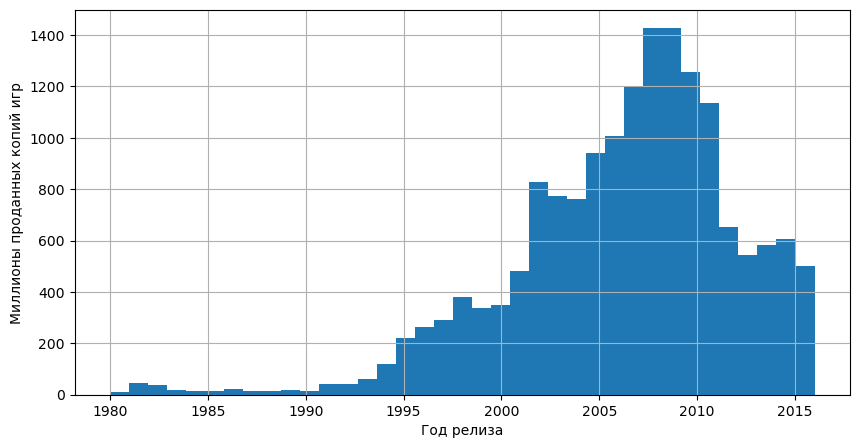

In [41]:
# построим гистограмму по годам выпуска игр
data['year_of_release'].hist(bins=37, range=(1980, 2016), figsize=(10, 5))
plt.ylabel('Миллионы проданных копий игр')
plt.xlabel('Год релиза')
plt.show()

In [42]:
# просмотрим данные столбца
data['year_of_release'].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Видим, что большая часть игр выпущена с 2000 по 2016 год. При этом пик выхода игр в 2008 году, далее количество выпускаемых игр начинает снижаться.

При этом середина общего количества игр приходиться на 2007 год. Количество выпуска игр пошло в рост с середины 90х. А резкий рост начался с 2002 года. 

Предварительно, для анализа стоит взять игр начиная с 2003 (75% всех игр) или с 2007 (50% всех игр).

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Узнаем платформы с наибольшими суммарными продажами.

In [43]:
# сгруппируем данные по платформе 
top_5 = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

display(top_5)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Получается ТОП-5 платформ по продажам: PS2, X360, PS3, Wii, DS.

In [44]:
# cгруппируем данные по ТОП-5 платформам
top_platforms = (data.query('platform in ("PS2", "X360", "PS3", "Wii", "DS")')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
)

display(top_platforms)

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
1985.0,0.02,NaN,NaN,NaN,NaN
2000.0,NaN,39.17,NaN,NaN,NaN
2001.0,NaN,166.43,NaN,NaN,NaN
2002.0,NaN,205.38,NaN,NaN,NaN
2003.0,NaN,184.31,NaN,NaN,NaN
2004.0,17.27,211.81,NaN,NaN,NaN
2005.0,130.14,160.66,NaN,NaN,8.25
2006.0,119.81,103.42,20.96,137.15,51.62
2007.0,146.94,75.99,73.19,152.77,95.41


Построим распределение по годам ТОП-5 платформ.

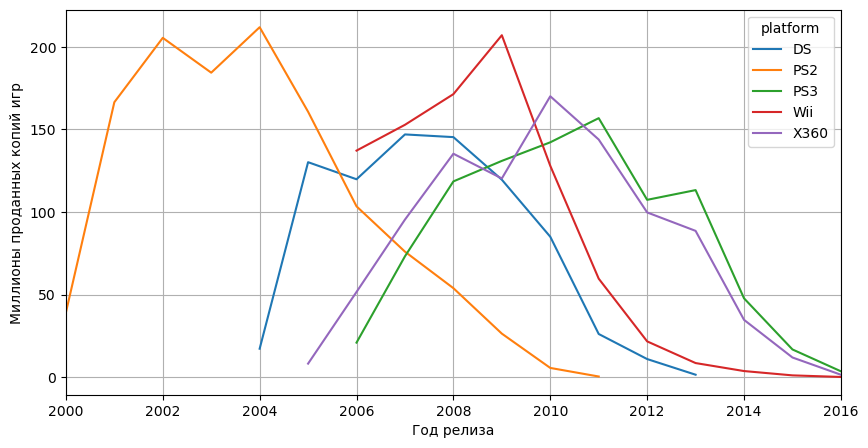

In [45]:
top_platforms.plot(grid=True, figsize=(10, 5))
plt.ylabel('Миллионы проданных копий игр')
plt.xlabel('Год релиза')
plt.xlim(2000, 2016)
plt.show()

По графику видно, что среднее время жизни платформ 10 лет. Распределение продаж по платформам X360 и PS3 нормальное, а по платформам DS, Wii, PS2 - смещенное вправо.

### Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

Так как время жизни платформы 10 лет и после 2007 приходиться половина всех выпущенных игр, стоит взять данные начиная с 2007 года.

Таким образом мы увидим информацию и по устаревшим платформам (продажи игр у них падают), и по новым платформам (продажи игр у них растут).

In [46]:
# создадим новый датафрейм с данными с 2007 года включительно
data_since_2007 = data[data['year_of_release'] >= 2007]

### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [47]:
# сведем информацию по продажам
prediction_platforms = (data_since_2007
                        .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
)

display(prediction_platforms)

platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2007.0,NaN,0.02,146.94,3.4,0.27,9.28,75.99,73.19,NaN,46.93,NaN,152.77,NaN,95.41,0.55,NaN
2008.0,NaN,0.04,145.31,NaN,NaN,12.42,53.90,118.52,NaN,34.55,NaN,171.32,NaN,135.26,0.18,NaN
2009.0,NaN,NaN,119.54,NaN,NaN,16.91,26.40,130.93,NaN,37.78,NaN,206.97,NaN,120.29,NaN,NaN
2010.0,NaN,NaN,85.02,NaN,NaN,24.28,5.64,142.17,NaN,35.04,NaN,127.95,NaN,170.03,NaN,NaN
2011.0,63.20,NaN,26.18,NaN,NaN,35.03,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN,NaN
2012.0,51.36,NaN,11.01,NaN,NaN,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN,NaN
2013.0,56.57,NaN,1.54,NaN,NaN,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,NaN,18.96
2014.0,43.76,NaN,NaN,NaN,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,NaN,54.07
2015.0,27.78,NaN,NaN,NaN,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,NaN,60.14


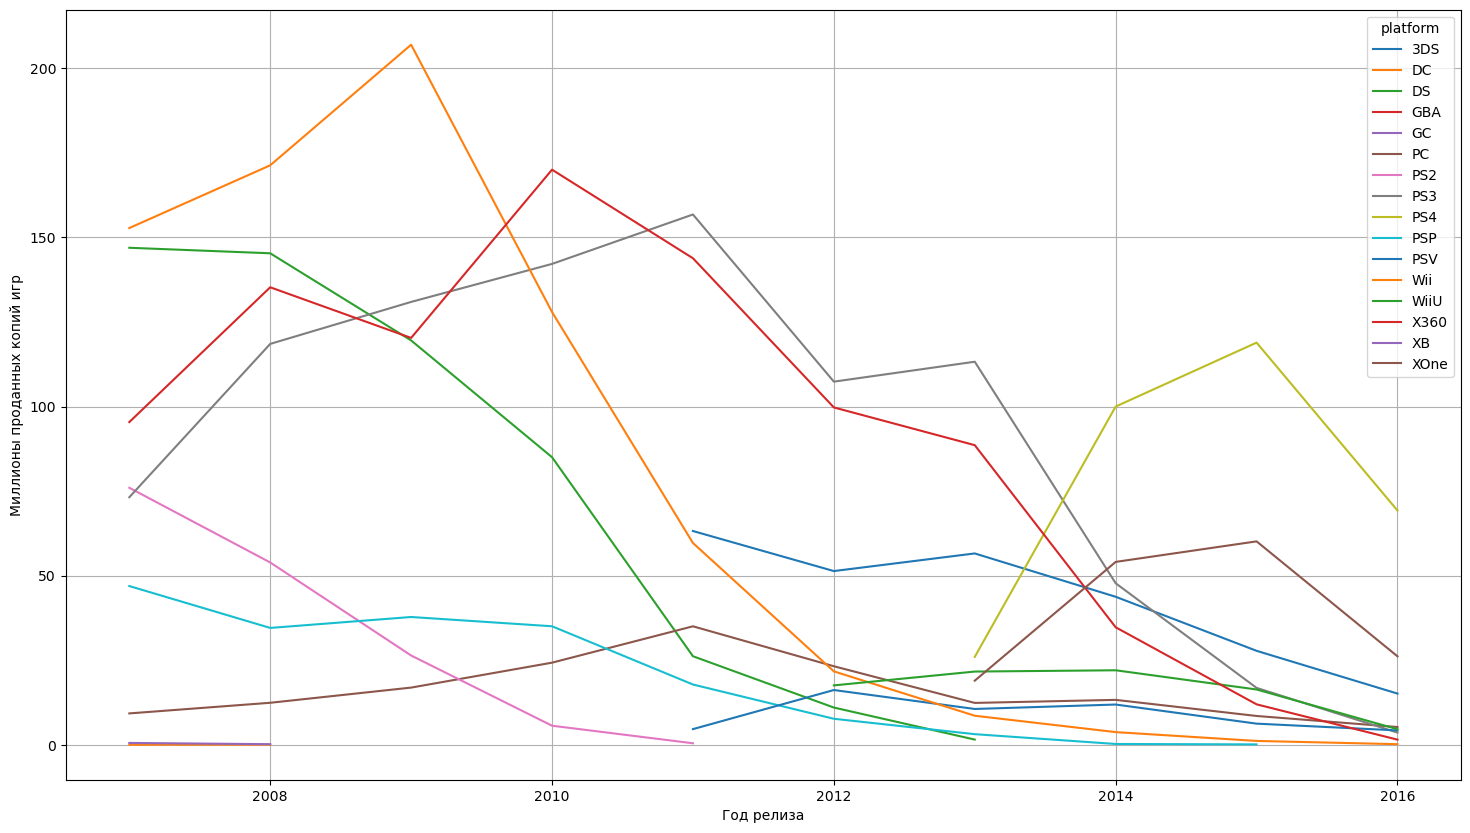

In [48]:
# построим график продаж по платформам
prediction_platforms.plot(grid=True, figsize=(18, 10))
plt.ylabel('Миллионы проданных копий игр')
plt.xlabel('Год релиза')
plt.show()

Судя по графику, рынок игр переживает не лучшие время. Общие продажи по всем игровым платформам снижаются.

На части игровых платформ прекратился выпуск игр на конец 2016, 
на другой части - продажи сильно снизились, либо изначально не были высокими.

Перспективными платформами являются только: PS4 и XOne. Хотя, пик продаж на этих платформах уже прошел, они будут существовать еще несколько лет с высоким уровнем продаж игр.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

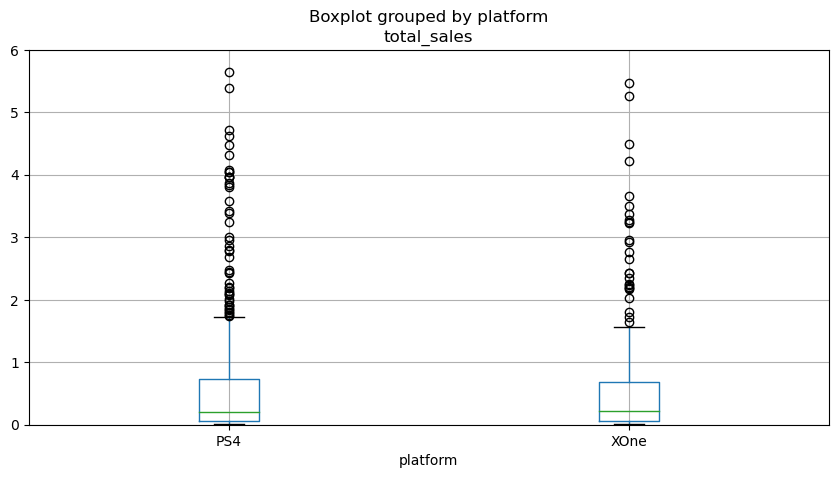

In [49]:
# построим график boxplot по продажам игр для PS4 и XOne
data_since_2007.query('platform in ("PS4", "XOne")').boxplot('total_sales', by='platform', figsize=(10, 5))
plt.ylim(0, 6)
plt.show()

Видим, что медиана и среднее значение сильно расходятся в обеих платформах. Данные скошены вправо, на графиках видны выбросы.

Можно сказать, что выходит много игр, которые продаются в 200 тыс копий и меньше. Но также выходят игры бестселлеры, имеющие продажи от 2 млн копий.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

In [50]:
# выдерем данные по платформе PS4
correlation_ps4 = data_since_2007.query('platform == "PS4" ')[['total_sales', 'critic_score', 'user_score']]

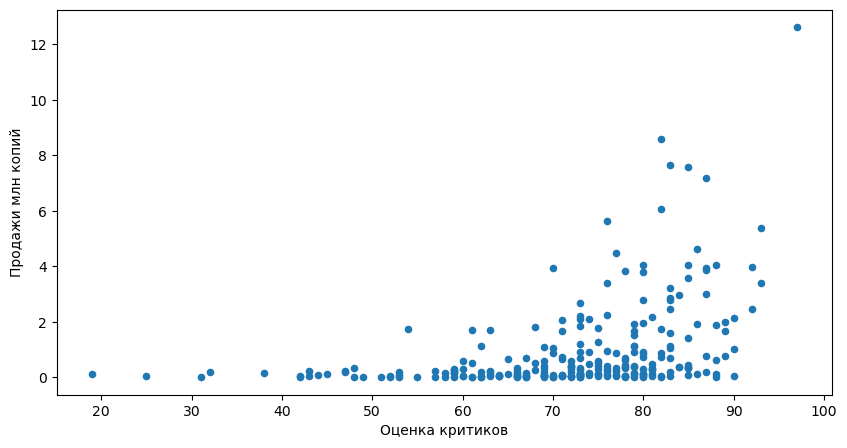

In [51]:
# построим диаграмму рассеивания 
correlation_ps4.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10, 5))
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи млн копий')
plt.show()

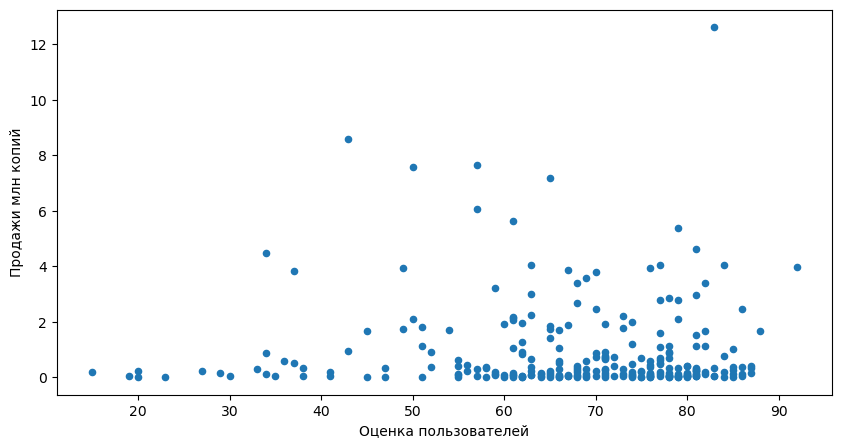

In [52]:
correlation_ps4.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10, 5))
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи млн копий')
plt.show()

In [53]:
# посчитаем корреляцию между общими продажами и отзывами критиков и пользователей
correlation_ps4.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Видим, что на продажи игр на платформе PS4 отзывы критиков оказывают слабое прямое влияние, а отзывы пользователей на продажи не влияют.

### Соотнесем выводы с продажами игр на других платформах.

Теперь посмотрим на корреляцию между продажами и оценками пользователей и критиков в платформе XOne.

In [54]:
# выберем данные по платформе XOne
correlation_xone = data_since_2007.query('platform == "XOne"')[['total_sales', 'critic_score', 'user_score']]

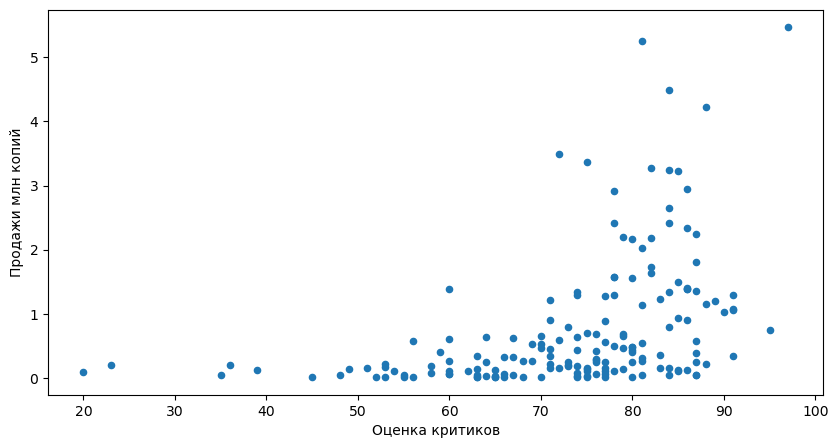

In [55]:
# построим диаграмму рассеивания
correlation_xone.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10, 5))
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи млн копий')
plt.show()

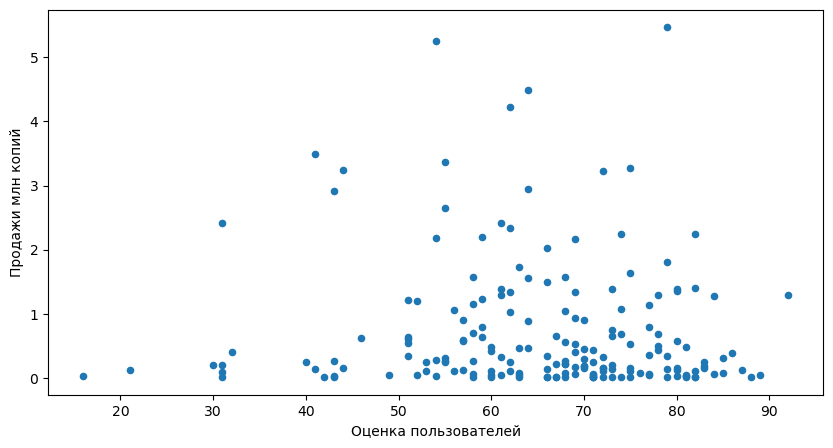

In [56]:
correlation_xone.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10, 5))
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи млн копий')
plt.show()

In [57]:
# посчитаем корреляцию между общими продажами и отзывами критиков и пользователей
correlation_xone.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


Видим, что по платформе XOne оценки критиков имеют слабое прямое влияние на продажи игр, а оценки пользователей не влияют на продажи.

Результат по платформам PS4 и XOne одинаков.

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [58]:
# соберем данные в таблицу
sales_genres = (data_since_2007
                .pivot_table(index='genre', values='total_sales', aggfunc='sum')
                .sort_values('total_sales', ascending=False)
)

display(sales_genres)

,total_sales
genre,
Action,1050.59
Shooter,678.80
Sports,658.07
Misc,487.89
Role-Playing,465.03
Racing,265.19
Platform,230.45
Simulation,199.13
Fighting,166.00


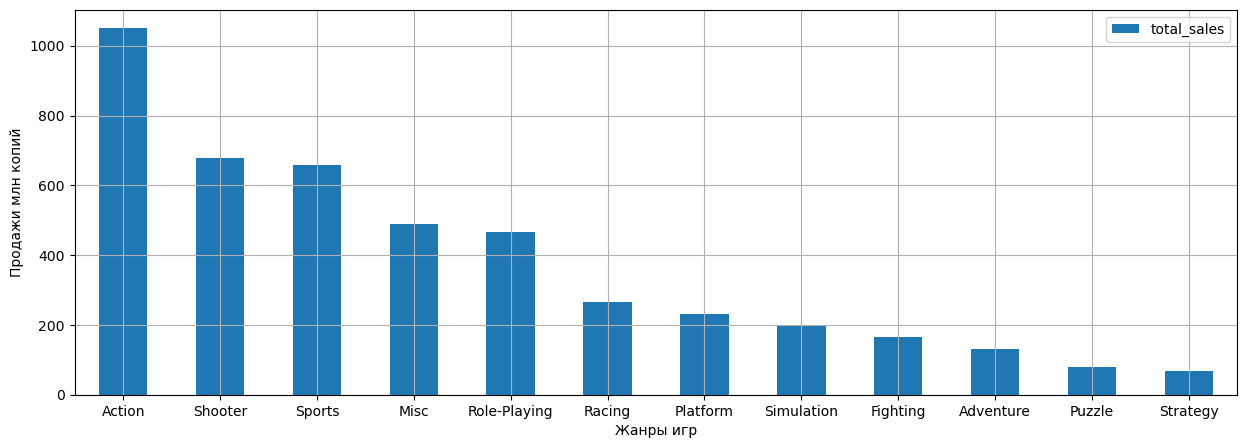

In [59]:
# построим диаграмму
sales_genres.plot(kind='bar', figsize=(15, 5), rot=0, grid=True)
plt.xlabel('Жанры игр')
plt.ylabel('Продажи млн копий')
plt.show()

Можно выделить самый прибыльный жанр в играх: Action. Этот жанр рассчитан на массовую аудиторию, имеет различный игровой процесс. Подходит и неопытным игрокам.

Самые не прибыльные жанры: Fighting, Adventure, Puzzle, Strategy. В этих жанрах требуется уже умение играть, они не рассчитаны на массовую аудиторию.

Остальные жанры игр имеют средние результаты по продажам. Это жанры: Shooter, Sports, Misc, Role-Playing, Racing, Platform, Simulation.

**Вывод:**

1. Нами было установлено, что пик выхода игр пришелся на 2008 год, далее количество выпускаемых игр начинает снижаться.

2. Мы выяснили, что среднее время жизни игровых платформ составляет 10 лет.

3. Для исследования мы взяли данные начиная с 2007 года. Таким образом мы увидили информацию и по устаревшим платформам и по новым платформам.

4. Общие продажи по всем игровым платформам снижаются. На данный момент перспективными платформами являются только: PS4 и XOne. При это пик продаж на этих платформах уже прошел, но они будут существовать еще несколько лет с высоким уровнем продаж игр.

5. Мы установили, что в основном числе игры продаются в 200 тысяч копий. Но иногда выходят игры бестселлеры, имеющие продажи от 2 миллионов копий.

6. Мы увидели, что на платформах PS4 и XOne оценки критиков имеют слабое прямое влияние на продажи игр, а оценки пользователей не влияют на продажи.

7. Был установлен самый прибыльный жанр в играх: Action. Самые не прибыльные жанры: Fighting, Adventure, Puzzle, Strategy. Остальные жанры игр имеют средние результаты по продажам.

## Составим портрет пользователя каждого региона.

Определим для пользователя каждого региона (NA, EU, JP):
1. Самые популярные платформы (топ-5). Опишем различия в долях продаж.
2. Самые популярные жанры (топ-5). Поясним разницу.
3. Узнаем влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы (топ-5). Опишем различия в долях продаж.

In [60]:
# определим Топ-5 платформ для региона NA
top_platforms_na = (data_since_2007.groupby('platform')
                    .agg({'na_sales': 'sum'})
                    .sort_values(by='na_sales', ascending=False).head()
)

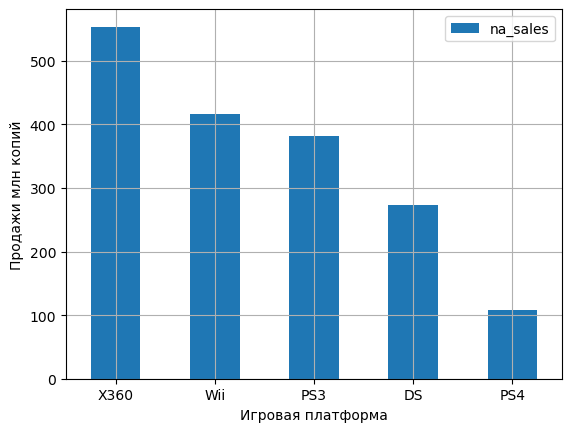

In [61]:
# построим гистограмму
top_platforms_na.plot(kind='bar', rot=0, grid=True)
plt.xlabel('Игровая платформа')
plt.ylabel('Продажи млн копий')
plt.show()

In [62]:
# определим Топ-5 платформ для региона EU
top_platforms_eu = (data_since_2007.groupby('platform')
                    .agg({'eu_sales': 'sum'})
                    .sort_values(by='eu_sales', ascending=False).head()
)

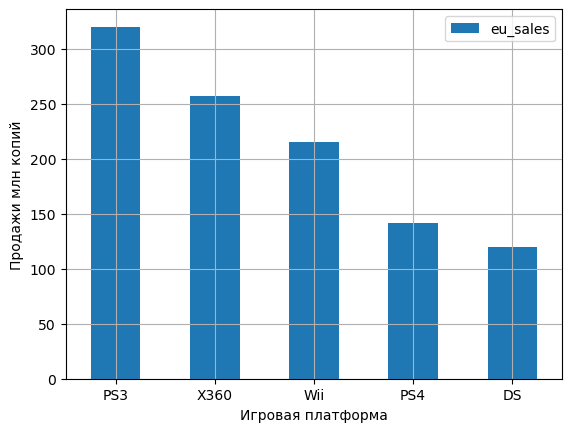

In [63]:
# построим гистограмму
top_platforms_eu.plot(kind='bar', rot=0, grid=True)
plt.xlabel('Игровая платформа')
plt.ylabel('Продажи млн копий')
plt.show()

In [64]:
# определим Топ-5 платформ для региона JP
top_platforms_jp = (data_since_2007.groupby('platform')
                    .agg({'jp_sales': 'sum'})
                    .sort_values(by='jp_sales', ascending=False).head()
)

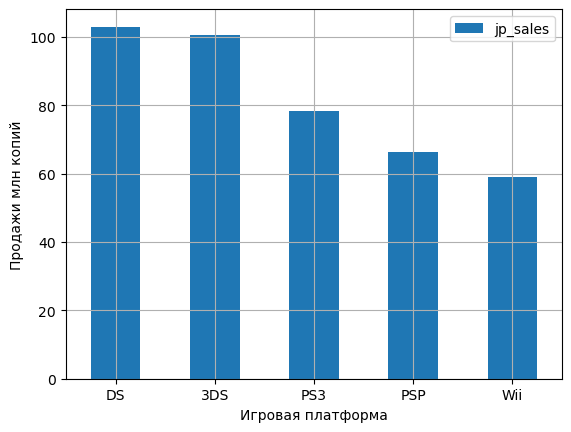

In [65]:
# построим гистограмму
top_platforms_jp.plot(kind='bar', rot=0, grid=True)
plt.xlabel('Игровая платформа')
plt.ylabel('Продажи млн копий')
plt.show()

Игровые рынки платформ Северной Америки и Европы схожи. Популярные платформы в этих регионах: PS3, Xbox360, Wii, PS4, DS.

Но рынок Японии сильно отличается. Самые популярные платформы это DS и 3DS, при это они не входят в Топ_5 Америки и Европы. Остальные платформы это PS3, PSP и Wii.

Видно, что в Японии много геймеров предпочитает играть на портативных консолях.

### Самые популярные жанры (топ-5). Поясним разницу.

In [66]:
# определим Топ-5 для региона NA
top_genres_na = data_since_2007.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).head()

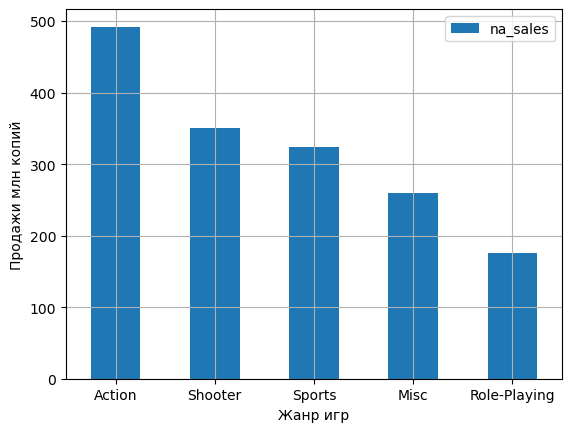

In [67]:
# построим гистограмму
top_genres_na.plot(kind='bar', rot=0, grid=True)
plt.xlabel('Жанр игр')
plt.ylabel('Продажи млн копий')
plt.show()

In [68]:
# определим Топ-5 для региона EU
top_genres_eu = data_since_2007.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).head()

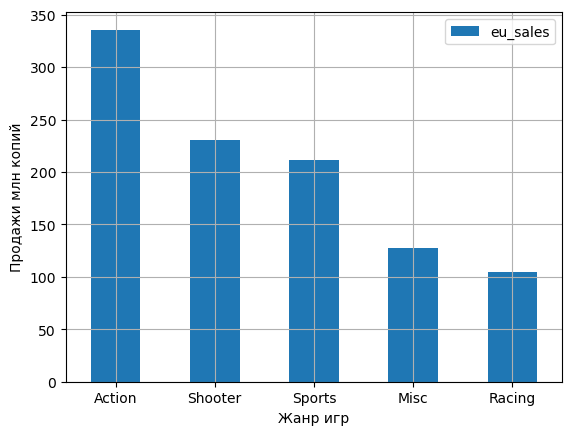

In [69]:
# построим гистограмму
top_genres_eu.plot(kind='bar', rot=0, grid=True)
plt.xlabel('Жанр игр')
plt.ylabel('Продажи млн копий')
plt.show()

In [70]:
# определим Топ-5 для региона JP
top_genres_jp = data_since_2007.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head()

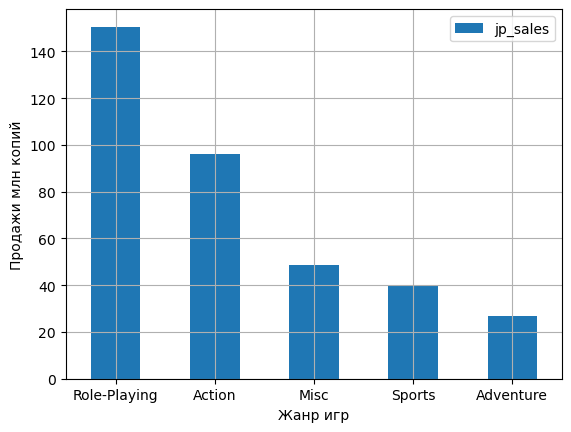

In [71]:
# построим гистограмму
top_genres_jp.plot(kind='bar', rot=0, grid=True)
plt.xlabel('Жанр игр')
plt.ylabel('Продажи млн копий')
plt.show()

Геймеры Северной Америки (NA) и Европы (EU) схожи. В их Топ-5 жанров игр входят Action, Shooter, Sports, Misc. В Америке еще любят Role-playing, а в Европе жанр Racing. При чем рейтинг жанров уменьшается постепенно.

Жители Японии (JP) схожи с жителями Америки и Европы только по популярным жанрам как:  Action, Sports, Misc.
В Японии больше всего любят Role-playing. На 5 месте стоит жанр Adventure, в который не входит топ-5 дргуих регионов. Рейтинг жанров резко уменьшается после 2 места. За жанрами Role-playing и Action стоит большая часть проданных игр в Японии.


### Узнаем влияет ли рейтинг ESRB на продажи в отдельном регионе?

Посмотрим игры с каким рейтингом ESRB продаются в регионах.

In [72]:
# определим влияние рейтинга для региона NA
rating_na = data_since_2007.groupby('rating').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).head()

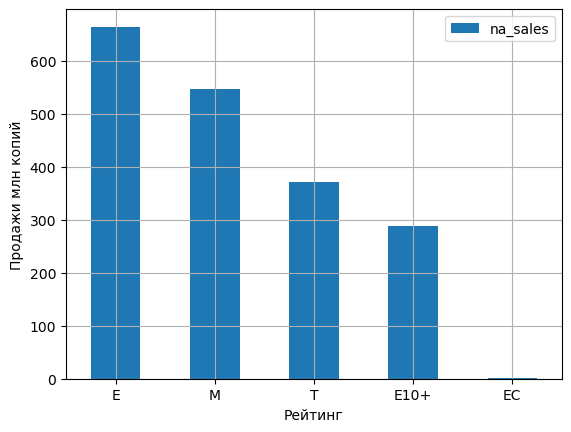

In [73]:
# построим гистограмму
rating_na.plot(kind='bar', rot=0, grid=True)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи млн копий')
plt.show()

In [74]:
# определим влияние рейтинга для региона EU
rating_eu = data_since_2007.groupby('rating').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).head()

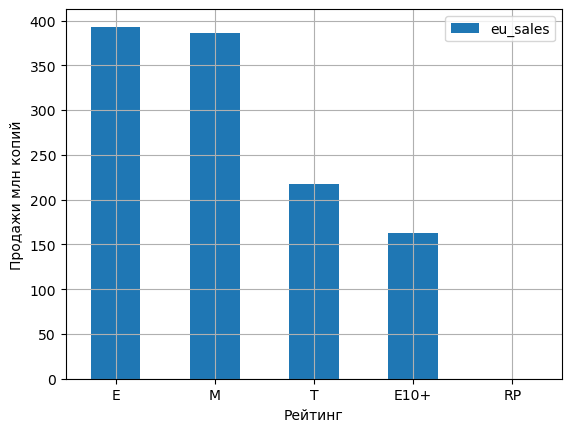

In [75]:
# построим гистограмму
rating_eu.plot(kind='bar', rot=0, grid=True)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи млн копий')
plt.show()

In [76]:
# определим влияние рейтинга для региона JP
rating_jp = data_since_2007.groupby('rating').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).head()

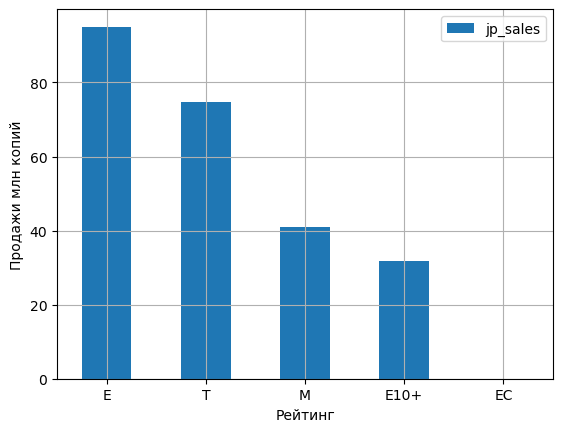

In [77]:
# построим гистограмму
rating_jp.plot(kind='bar', rot=0, grid=True)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи млн копий')
plt.show()

Геймеры 3 регионов особо не отличаются по возрастному рейтингу игр. Первые 4 места занимают: 'E' - Everyone, 'T' - Teen, 'M' - Mature, 'E10+' - Everyone 10 and older.


5 место в Америке и Японии занимаем жанр 'EC' - Early childhood, в Европе на 5 мест - 'RP' или Rating Pending (рейтинг ожидается).

Видно в Европе в игры с рейтингом Mature играют больше, чем с рейтингом Teen. Что говорит о том, что в Европе доля геймеров от 18+ может быть больше, чем в Америке и Японии.

**Вывод:**

1. Игровые рынки платформ Северной Америки и Европы схожи, популярные платформы: PS3, Xbox360, Wii, PS4, DS. Рынок Японии сильно отличается. Самые популярные платформы: DS и 3DS, PS3, PSP и Wii. Заметно, что в Японии много геймеров предпочитает играть на портативных консолях.

2. В Топ-5 жанров игр Северной Америки и Европы входят Action, Shooter, Sports, Misc. В Америке любят Role-playing, а в Европе жанр Racing. В Японии схожи с жителями Америки и Европы только по популярным жанрам как:  Action, Sports, Misc, а различаются по жанрам Role-playing и Adventure. При этом за жанрами Role-playing и Action стоит большая часть проданных игр в Японии.

3. Геймеры 3 регионов особо не отличаются по возрастному рейтингу игр. Топ возрастных рейтингов: 'E' - Everyone, 'T' - Teen, 'M' - Mature, 'E10+' - Everyone 10 and older, 'EC' - Early childhood. Видно в Европе в игры с рейтингом Mature играют больше, чем с рейтингом Teen. Что говорит о том, что в Европе доля геймеров от 18+ может быть больше, чем в Америке и Японии.

## Проверим гипотезы.

Проверим гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Зададим самостоятельно пороговое значение alpha.

Поясним:

1. Как сформулировали нулевую и альтернативную гипотезы;

2. Какой критерий применили для проверки гипотез и почему.

###  Проверка гипотезы: _Средние пользовательские рейтинги платформ Xbox One и PC одинаковые_

Для проверки гипотезы _Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые_ мы будем сравнивать 2 выборки на равенство их средних. Для этого подойдет функция ttest_ind из библиотеки scipy. Выборки не зависимы друг от друга.

Составим нулевую и альтернативную гипотезу: 

_H0: Средние пользовательские рейтинги (user_score) платформы Xbox One = Средним пользовательским рейтингам (user_score) платформы PC_

_H1: Средние пользовательские рейтинги (user_score) платформы Xbox One ≠ Средним пользовательским рейтингам (user_score) платформы PC_

Если средние 2 выборок равны то принимаем нулевую гипотезу (H0), если средние 2 выборок не равны - отвергаем нулевую гипотезу (H0) и принимаем альтернативную (H1).

In [78]:
# создаем массивы пользовательских рейтингов для платформ Xbox One и PC
xbox_one = data_since_2007[data_since_2007['platform'] == 'XOne']['user_score']
pc = data_since_2007[data_since_2007['platform'] == 'PC']['user_score']

In [79]:
# узнаем длины массивов
display(len(xbox_one))

display(len(pc))

247

724

Длины списков разные и значения списков разные, поэтому в t-тесте дисперсию будем считать различной у выборок.

У нас большие выборки в диапазоне от 100 до 1000 значений, поэтому лучше поставить уровень значимости 5%. Так снизим вероятность принять неверную гипотезу.

In [80]:
# зададим уровень значимости
alpha = 0.05

# nan_policy=omit, т.к. есть NaN
result_test_1 = st.ttest_ind(xbox_one, pc, equal_var = False, nan_policy='omit')

print('Значение p-value:', result_test_1.pvalue)

if result_test_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Значение p-value: 0.04401892858926047
Отвергаем нулевую гипотезу


Значение p-value в 4.4% на гране. Если мы бы поставили уровень критической значимости 1%, нулевая гипотеза была бы принята. Но это повышает вероятность принять неправильную гипотезу. Оставим уровень критической значимости в 5%.

Итак, мы отвергаем нулевую гитотезу, _Средние пользовательские рейтинги платформы Xbox One равны Средним пользовательским рейтингам платформы PC_.

Мы предполагаем, что _Средние пользовательские рейтинги платформ Xbox One и PC разные_.

###  Проверка гипотезы: _Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные_

Для проверки гипотезы _Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные_ мы также, как и в предыдущем тесте, будем сравнивать средние 2 выборок. Выборки независимы. 
Будем использовать опять функцию st.ttest_ind.

Так как нулевая гипотеза должна содержать равенство, то просто сделаем гипотезу наоборот. Далее узнаем можем ли мы принять альтернативную гипотезу.

Сформулируем нулевую и альтернативную гипотезы:

_H0: Средние пользовательские рейтинги (user_score) жанра Action = Средним пользовательским рейтингам (user_score) жанра Sports._

_H1: Средние пользовательские рейтинги (user_score) жанра Action ≠ Средним пользовательским рейтингам жанра (user_score) Sports._

Если средние 2 выборок равны то принимаем нулевую гипотезу (H0), если средние 2 выборок не равны - отвергаем нулевую гипотезу (H0) и принимаем альтернативную (H1).

In [81]:
# подготовим 2 выборки
action = data_since_2007[data_since_2007['genre'] == 'Action']['user_score']
sports = data_since_2007[data_since_2007['genre'] == 'Sports']['user_score']

In [82]:
# измерим длины массивов
display(len(action))
display(len(sports))

2198

1124

Длины списков разные и значения списков разные, поэтому в t-тесте дисперсию будем считать различной у выборок.

У нас большие выборки от 1000 значений, поэтому лучше поставить уровень значимости 1%. Так снизим вероятность отбросить неверную гипотезу.

In [83]:
# задаем уровень критической значимости
alpha = 0.01

# nan_policy из-за Nan в массивах
result_test_2 = st.ttest_ind(action, sports, equal_var=False, nan_policy='omit')

print('Значение pvalue:', result_test_2.pvalue)

if result_test_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Значение pvalue: 4.540665510055309e-11
Отвергаем нулевую гипотезу


Итак, мы отвергаем нулевую гипотезу, значит мы принимаем противоположную - альтернативную гипотезу.

Так как мы гипотезы строили наоборот (чтобы в нулевой гипотезе было равенство), то мы принимаем гипотезу _Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные_.

**Вывод:**

Гипотезы были проверены.

1. Гипотеза 'Средние пользовательские рейтинги платформ Xbox One и PC одинаковые' **была отвергнута**. 
Предполагаем, что Средние пользовательские рейтинги платформ Xbox One и PC разные.

2. Гипотеза 'Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные' **была принята**.

## Общий вывод.

Мы провели исследование продаж компьютерных игр по различным игровым платформам с 1980 по 2016 год.
Датафрейм был обработан, мы заполнили пропуски, удалили дубликаты и обработали аномальные значения. После подготовки данных, мы ответили на поставленные вопросы исследования.

**Вывод:**

1. Нами было установлено, что пик выхода игр пришелся на 2008 год, далее количество выпускаемых игр начинает снижаться. Мы выяснили, что среднее время жизни игровых платформ составляет 10 лет.

2. Общие продажи по всем игровым платформам снижаются. На данный момент перспективными платформами являются только: PS4 и XOne. При это пик продаж на этих платформах уже прошел, но они будут существовать еще несколько лет с высоким уровнем продаж игр.

3. Мы установили, что в основном числе игры продаются в 200 тысяч копий. Но иногда выходят игры бестселлеры, имеющие продажи от 2 миллионов копий.

4. Мы увидели, что на платформах PS4 и XOne оценки критиков имеют слабое прямое влияние на продажи игр, а оценки пользователей не влияют на продажи.

5. Был установлен самый прибыльный жанр в играх: Action. Самые не прибыльные жанры: Fighting, Adventure, Puzzle, Strategy. Остальные жанры игр имеют средние результаты по продажам.

6. Игровые рынки платформ Северной Америки и Европы схожи, популярные платформы: PS3, Xbox360, Wii, PS4, DS. Рынок Японии сильно отличается. Самые популярные платформы: DS и 3DS, PS3, PSP и Wii. Заметно, что в Японии много геймеров предпочитает играть на портативных консолях.

7. В Топ-5 жанров игр Северной Америки и Европы входят Action, Shooter, Sports, Misc. В Америке любят Role-playing, а в Европе жанр Racing. В Японии схожи с жителями Америки и Европы только по популярным жанрам как:  Action, Sports, Misc, а различаются по жанрам Role-playing и Adventure. При этом за жанрами Role-playing и Action стоит большая часть проданных игр в Японии.

8. Геймеры 3 регионов особо не отличаются по возрастному рейтингу игр. Топ возрастных рейтингов: 'E' - Everyone, 'T' - Teen, 'M' - Mature, 'E10+' - Everyone 10 and older, 'EC' - Early childhood. Видно в Европе в игры с рейтингом Mature играют больше, чем с рейтингом Teen. Что говорит о том, что в Европе доля геймеров от 18+ может быть больше, чем в Америке и Японии.

Гипотезы были проверены.

1. Гипотеза 'Средние пользовательские рейтинги платформ Xbox One и PC одинаковые' **была отвергнута**. 
Предполагаем, что Средние пользовательские рейтинги платформ Xbox One и PC разные.

2. Гипотеза 'Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные' **была принята**.

**Рекомендации:**
1. На данный момент стоит сосредоточиться на продажах игр для платформ PS4 и Xbox One.

2. Следует ослеживать появление новых игровых платформ и усиленно продавать игры для них, на старте платформ идет сильный рост продаж.

3. Из исследования видно, что продажи игр на игровых платформах падают, а все больше людей играют на телефонах. Стоит провести исследование на проверку гипотезы 'Игры на мобильных устройствах (телефон, планшет) составляют большой процент от игровых платформ'. Надо узнать какой объем продаж игр на мобильных устройствах и стоит ли обратить внимание на продажи на этом рынке.